In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

Data Collection and Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')

In [ ]:
# print first 5 rows of the dataset
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
# print last 5 rows of the dataset
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
# number of rows and columns in the dataset
data.shape

(569, 6)

In [ ]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
# checking for missing values
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [ ]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 0 duplicates data


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis


In [ ]:
# statistical measures about the data
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


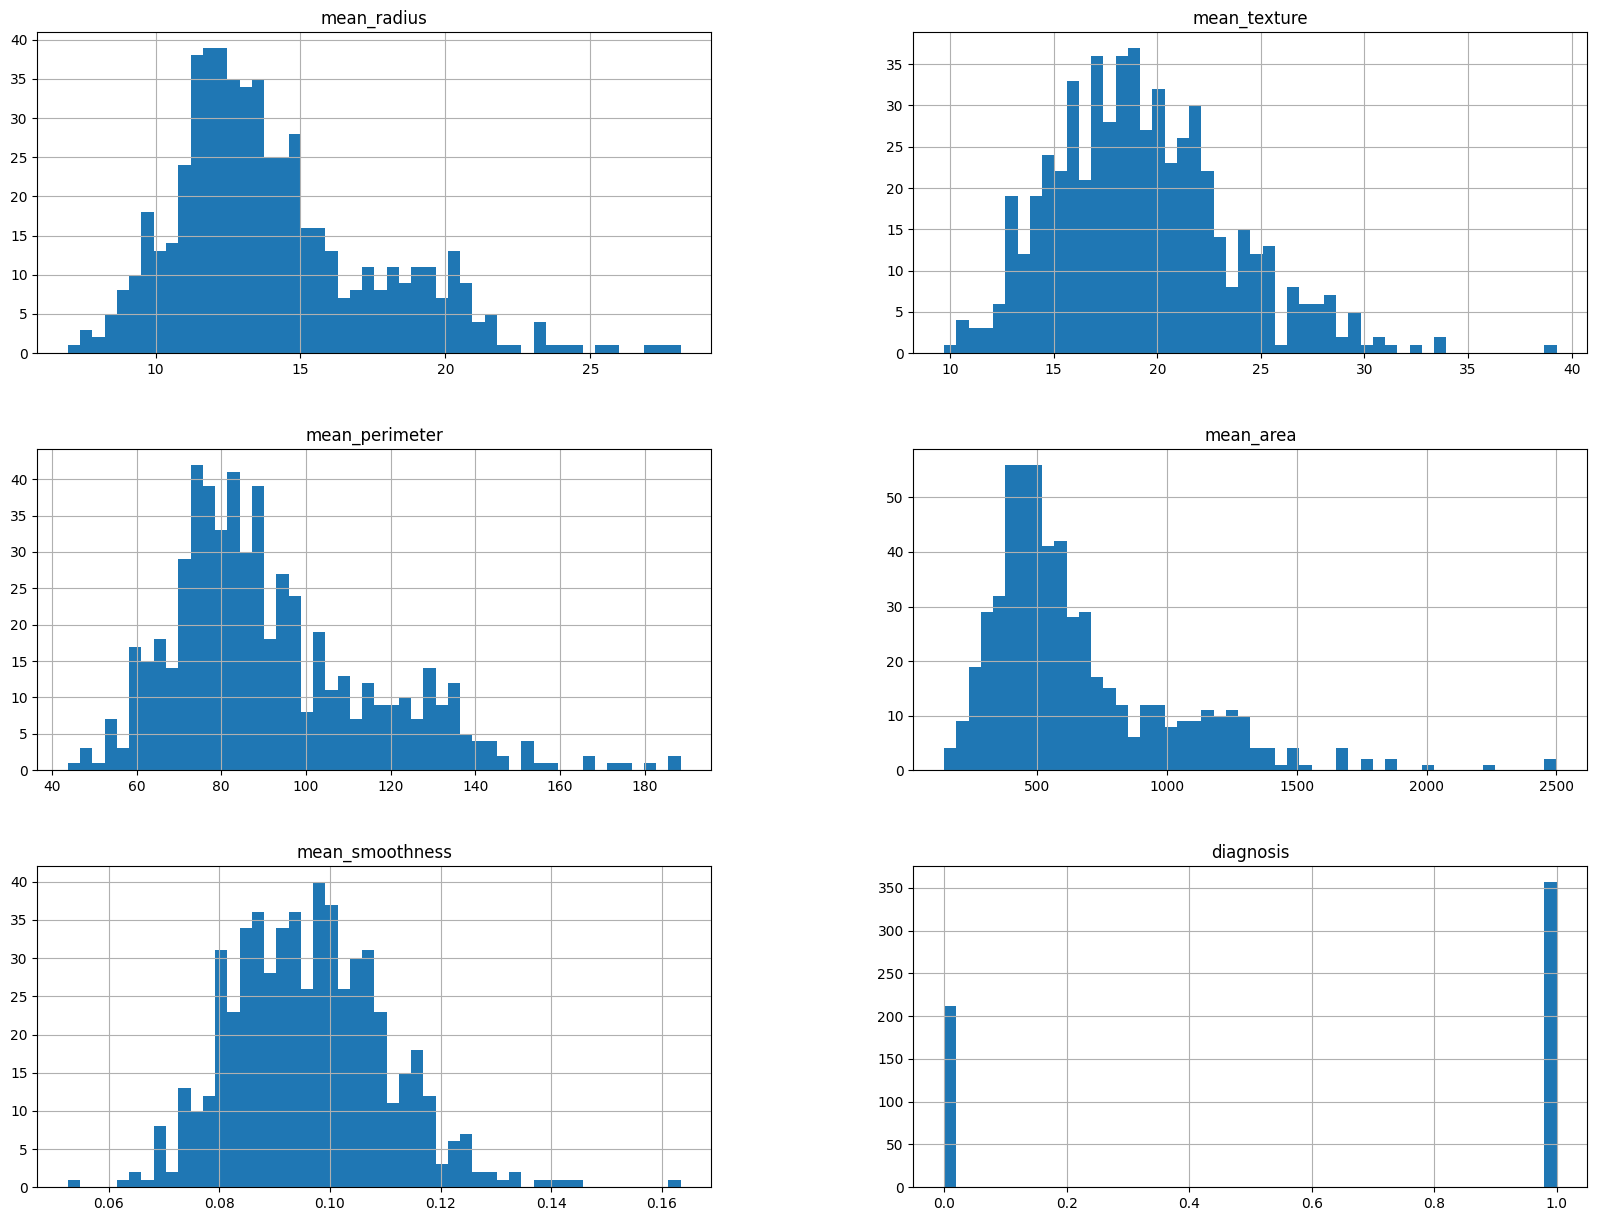

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

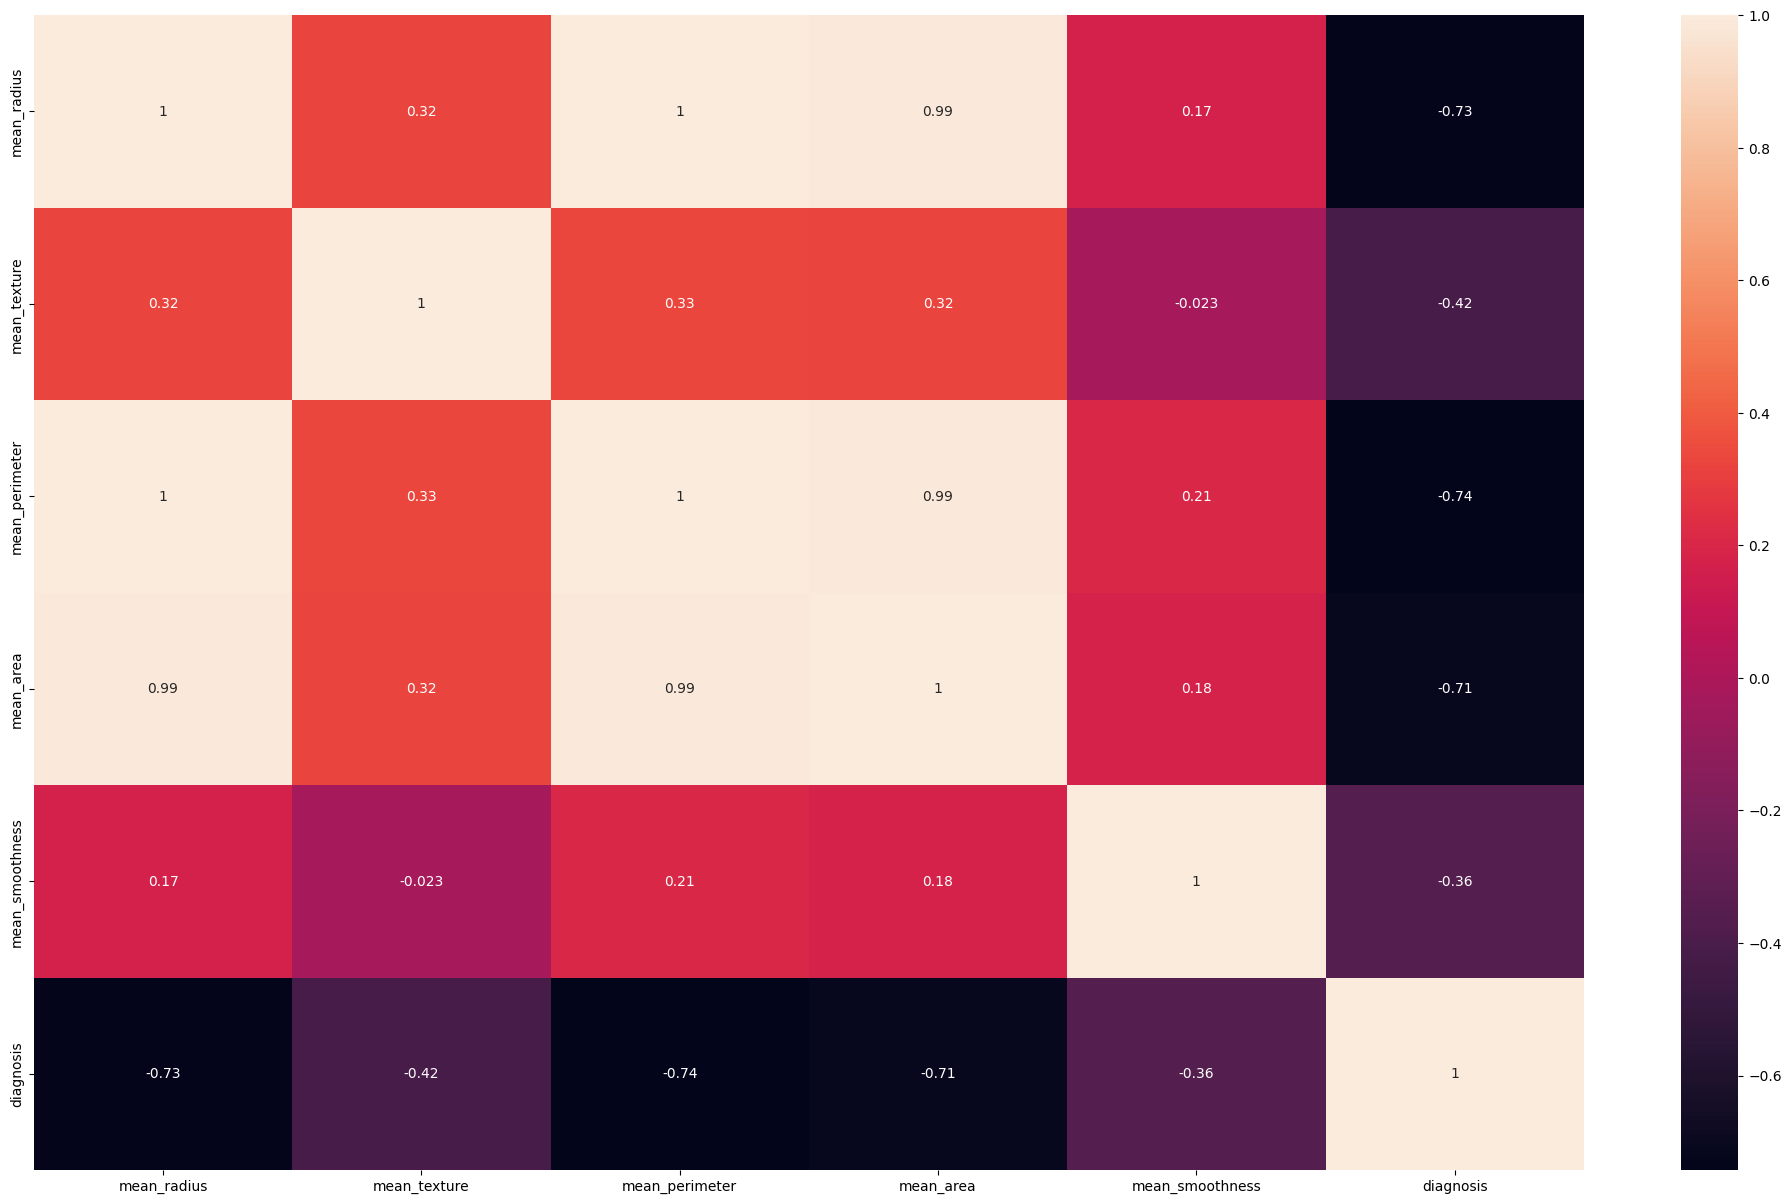

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = data.corr(method='pearson')

correlation_matrix

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [ ]:
# checking the distribution of diagnosis Variable
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.0 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2439 sha256=53a98a9fd73314c18617c4ce43ed5d2632f61131d619892dcf1a9ae885bd916c
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [ ]:
from featurewiz import featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (569, 6)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############################################

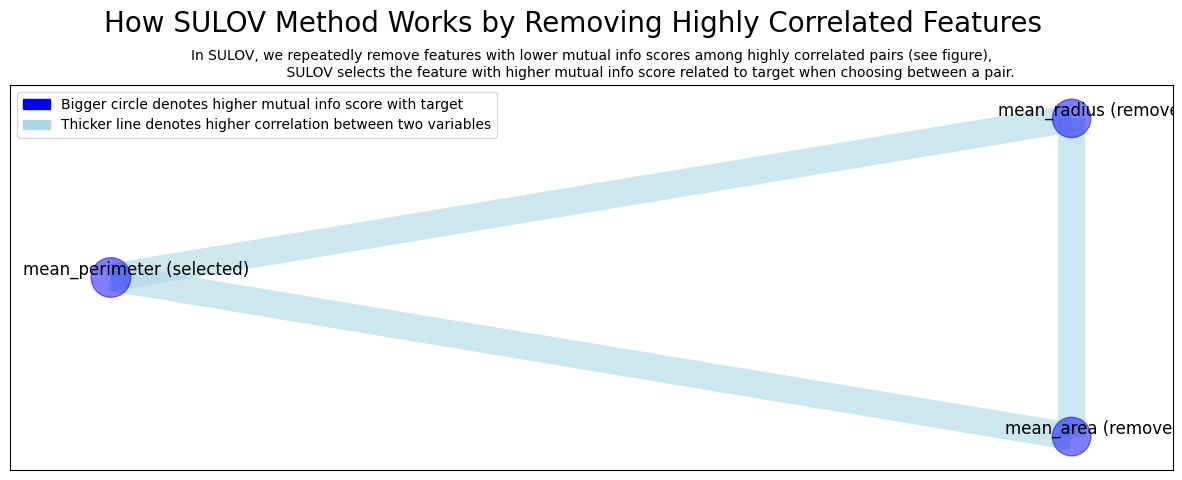

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 3
Final list of selected 3 vars after SULOV = ['mean_texture', 'mean_smoothness', 'mean_perimeter']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 2 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
        Selected: ['mean_perimeter', 'mean_smoothness']
            Time taken for regular XGBoost feature selection = 0 seconds


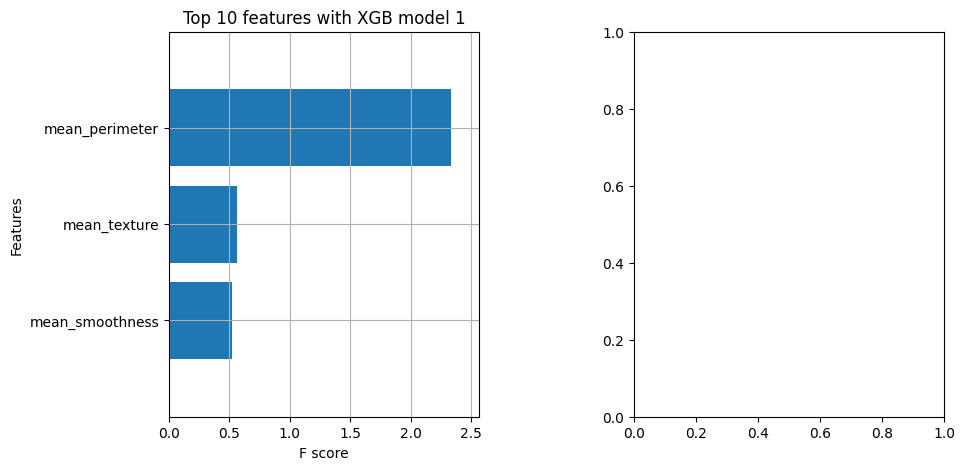

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 2 important features:
['mean_perimeter', 'mean_smoothness']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 2 important features and a train dataframe


In [ ]:
diagnosis = 'diagnosis'

features= featurewiz(data, diagnosis, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

Splitting the Features and diagonsis

In [ ]:
x = data.drop(columns='diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
print(x)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.25,  random_state=42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(569, 5) (426, 5) (143, 5)


Model Training

In [ ]:
#Random Forest
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

mse= 0.03496503496503497
msle= 0.016799056430706342
mae= 0.03496503496503497
rmse= 0.18698939800169145


In [ ]:
#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        54
           1       0.93      0.91      0.92        89

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143

mse= 0.0979020979020979
msle= 0.047037358005977754
mae= 0.0979020979020979
rmse= 0.3128931093873719


In [ ]:
# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.98      0.91      0.94        89

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143

mse= 0.06993006993006994
msle= 0.033598112861412684
mae= 0.06993006993006994
rmse= 0.26444294267397256


In [ ]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.91      0.96      0.93        89

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143

mse= 0.08391608391608392
msle= 0.04031773543369522
mae= 0.08391608391608392
rmse= 0.28968272975116055


In [ ]:
# support vector machine object
svm1 = SVC(kernel='linear')
# train the model on train set
svm1.fit(x_train, y_train.ravel())
predictions4 = svm1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

mse= 0.055944055944055944
msle= 0.02687849028913015
mae= 0.055944055944055944
rmse= 0.23652495839563303


In [ ]:
pip install imblearn

In [ ]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 42)

x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (536, 5)
After OverSampling, the shape of train_y: (536,) 

Before OverSampling, counts of label '1': 268
Before OverSampling, counts of label '0': 158
After OverSampling, counts of label '1': 268
After OverSampling, counts of label '0': 268


In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train_res, y_train_res.ravel())
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.98      0.96      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

mse= 0.04195804195804196
msle= 0.020158867716847613
mae= 0.04195804195804196
rmse= 0.20483662259967567


In [ ]:
#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(x_train_res, y_train_res.ravel())
predictions1 = DT.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        54
           1       0.94      0.87      0.90        89

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.89      0.88      0.88       143

mse= 0.11888111888111888
msle= 0.05711679186440156
mae= 0.11888111888111888
rmse= 0.3447914135838056


In [ ]:
# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(x_train_res, y_train_res.ravel())
predictions2 = XGB.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.98      0.91      0.94        89

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143

mse= 0.06993006993006994
msle= 0.033598112861412684
mae= 0.06993006993006994
rmse= 0.26444294267397256


In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(x_train_res, y_train_res.ravel())
predictions3 = KNN.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.94      0.92      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

mse= 0.08391608391608392
msle= 0.04031773543369522
mae= 0.08391608391608392
rmse= 0.28968272975116055


In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.93      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

mse= 0.055944055944055944
msle= 0.02687849028913015
mae= 0.055944055944055944
rmse= 0.23652495839563303


In [ ]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

In [ ]:
#NEAR MISS RESULT
print('After UnderSampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))




print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (316, 5)
After UnderSampling, the shape of train_y: (316,) 

Before UnderSampling, counts of label '1': 268
Before UnderSampling, counts of label '0': 158
After UnderSampling, counts of label '1': 158
After UnderSampling, counts of label '0': 158


In [ ]:
#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions = rf2.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        54
           1       0.98      0.90      0.94        89

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

mse= 0.07692307692307693
msle= 0.03695792414755396
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
#Decison Tree
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_miss, y_train_miss.ravel())
predictions1 = DT2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        54
           1       0.93      0.83      0.88        89

    accuracy                           0.85       143
   macro avg       0.84      0.86      0.85       143
weighted avg       0.86      0.85      0.85       143

mse= 0.14685314685314685
msle= 0.07055603700896665
mae= 0.14685314685314685
rmse= 0.38321423101595126


In [ ]:
# XGB classifier machine object
XGB2 = XGBClassifier()
# train the model on train set
XGB2.fit(x_train_miss, y_train_miss.ravel())
predictions2 = XGB2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        54
           1       0.96      0.88      0.92        89

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143

mse= 0.0979020979020979
msle= 0.047037358005977754
mae= 0.0979020979020979
rmse= 0.3128931093873719


In [ ]:
# KNN classifier machine object
KNN2 =  KNeighborsClassifier()
# train the model on train set
KNN2.fit(x_train_miss, y_train_miss.ravel())
predictions3 = KNN2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.91      0.96      0.93        89

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143

mse= 0.08391608391608392
msle= 0.04031773543369522
mae= 0.08391608391608392
rmse= 0.28968272975116055


In [ ]:
# support vector machine object
svm2 = SVC(kernel='linear')
# train the model on train set
svm2.fit(x_train_miss, y_train_miss.ravel())
predictions4 = svm2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

mse= 0.055944055944055944
msle= 0.02687849028913015
mae= 0.055944055944055944
rmse= 0.23652495839563303


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.93      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [ ]:
Accuracy=accuracy_score(y_test, predictions4)
precision=precision_score(y_test, predictions4)
recall=recall_score(y_test, predictions4)
f1=f1_score(y_test, predictions4)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

Accuracy= 0.9440559440559441
precision= 0.9764705882352941
recall= 0.9325842696629213
f1= 0.9540229885057471


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [None, 6, 2],
    'min_samples_split': [5, 10, 20]
}

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 20, 'n_estimators': 200}
Test Accuracy: 0.965034965034965


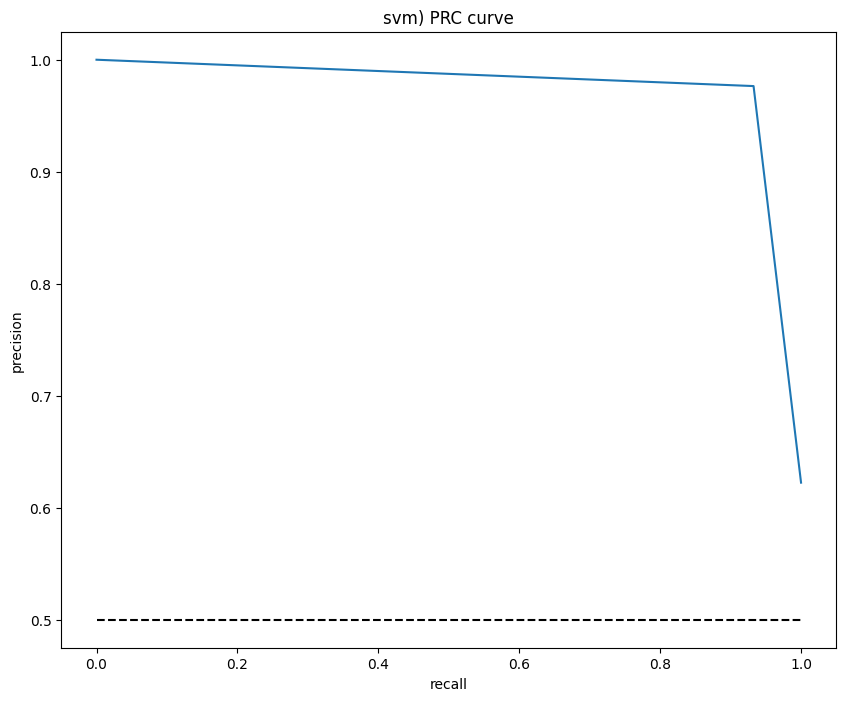

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions4)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'svm')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('svm) PRC curve')
plt.show()

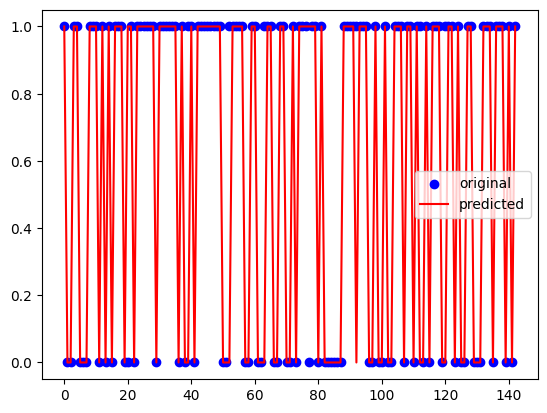

In [ ]:
y = y_test
yhat = predictions4
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()